## Objective: Explore the dataset to uncover patterns, identify data quality issues, and form hypotheses that will guide your feature engineering.

Use Jupyter Notebook (notebooks/eda.ipynb) for all exploratory work. This notebook is for exploration only; it is not for production code.

Instructions:

## Overview of the Data:
Understand the structure of the dataset, including the number of rows, columns, and data types.

## Summary Statistics
Understand the central tendency, dispersion, and shape of the dataset’s distribution.
## Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.
## Distribution of Categorical Features
Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.
## Correlation Analysis
Understanding the relationship between numerical features.
## Identifying Missing Values
Identify missing values to determine missing data and decide on appropriate imputation strategies.
Outlier Detection
Use box plots to identify outliers.

## Data fields

## TransactionId: Unique transaction identifier on the platform
## BatchId: Unique number assigned to a batch of transactions for processing
## AccountId: Unique number identifying the customer on the platform
## SubscriptionId: Unique number identifying the customer subscription
## CustomerId: Unique identifier attached to Account
## CurrencyCode: Country currency
## CountryCode: Numerical geographical code of the country
## ProviderId: Source provider of the Item bought.
## ProductId: Item name being bought.
## ProductCategory: ProductIds are organized into these broader product categories.
## ChannelId: Identifies if the customer used web, Android, IOS, pay later, or checkout.
## Amount: Value of the transaction. Positive for debits from the customer account and negative for credits into the customer account.
## Value: Absolute value of the amount
## TransactionStartTime: Transaction start time
## PricingStrategy: Category of Xente's pricing structure for merchants
## FraudResult: Fraud status of transaction 1 = yes, 0 = No

# Step 1-  Loading data and seeing the first 5 rows

In [1]:
import sys
from pathlib import Path

# Add src to path so we can import our module
PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT / "src"))

from eda import load_raw_data, overview

data_path = PROJECT_ROOT / "data" / "raw" / "data.csv"
print(f"Loading data from: {data_path}")

df = load_raw_data(data_path)
df.head()



Loading data from: c:\Users\yeget\-End-To-End-Credit-Risk-Probability-Model-\data\raw\data.csv


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# Step 1- Overview of the data 
## Understand the structure of the dataset, including the number of rows, columns, and data types.

In [2]:
ov = overview(df)
print(f"Rows: {ov['n_rows']}, Columns: {ov['n_cols']}")
print('\nColumns:')
print(ov['columns'])
print('\nDtypes:')
for k,v in ov['dtypes'].items():
    print(f"  {k}: {v}")
print(ov['info'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## From the overview of the data we can see that we have 16 columns and 95662, rows
## We can see that none of the rows have missing values altough a deep dive is required to confirm this
##  We can see the data types of each column to help us in our analysis. Most are of type object so we need to convert them to the right data types for analysis. 
##  `TransactionStartTime` is currently an `object` (string) and must be converted to `datetime`.
##  `FraudResult` and `PricingStrategy` are integers but act as categorical/flags.

# Step 2- Summary Statistics
## Understand the central tendency, dispersion, and shape of the dataset’s distribution.

In [3]:
print(ov['describe'])

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


## Interpretation of summary statistics
 CountryCode
 CountryCode is constant (256) — drop it; no predictive value.

## Value (absolute)

Count = 95,662
Median = 1,000; 75% = 5,000
Mean ≈ 9,900 with a very large std → heavy right tail and extreme outliers (max ≈ 9.88M)
Most transactions are small; a few very large transactions inflate the mean.
Recommendation: use log-transform or robust scaling for Value.

## Amount (signed)
Median = 1,000; mean ≈ 6,717; min = -1,000,000; max = 9,880,000
Both credits (negative) and debits (positive) exist with large extremes.
Many small transactions and a few very large ones drive sums and std.
Credit vs Debit analysis needed
Compute counts and total monetary volume for negative Amounts (credits/refunds) and positive Amounts (debits/payments) to understand directionality.

## Actionable features to create

Total debit volume per account
Total credit volume per account
Counts of credits and debits, fraction of credits
Max debit and max credit per account
Log(Value) and robust-scaled Amount (or handle sign separately)

# Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

In [ ]:
from eda import plot_numerical_distributions
plot_numerical_distributions(df)

# Interpretation of  Numerical Features Distribution
Dominance of Micro-Transactions:

The vast majority of transaction volume consists of very small amounts (likely airtime top-ups or small data bundles).
Business Insight: The platform is primarily a high-frequency, low-value utility tool for most users. Revenue strategy should focus on volume rather than high margins per transaction.
Distinct User Segments (Multi-Modal Distribution):

The data shows clear "bumps" or clusters of activity rather than a smooth curve.
Tier 1 (~50 - 500 UGX): Casual users (Airtime/Fees).
Tier 2 (~1,000 - 5,000 UGX): Standard users (P2P transfers/Bill payments).
Tier 3 (~10,000+ UGX): Power users or Business accounts.
Action: We can create a UserTier feature to treat these groups differently in the risk model.
Credits vs. Debits Behavior:

Credits (Negative Amounts): Show sharp spikes at specific values. This implies standardized inflows, such as automated refunds, rewards, or specific loan disbursements.
Debits (Positive Amounts): Show a smoother, wider variance. This reflects organic, varied customer spending behavior.
High-Value "Whales" (Outliers):

Even on a compressed scale, there is a long tail of extreme high-value transactions.
Risk Insight: These outliers represent a mix of VIP customers (high revenue) and potential fraud/money laundering risks. They
cannot be treated as "average" users and require a dedicated risk threshold.

## Distribution of Categorical Features
Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.



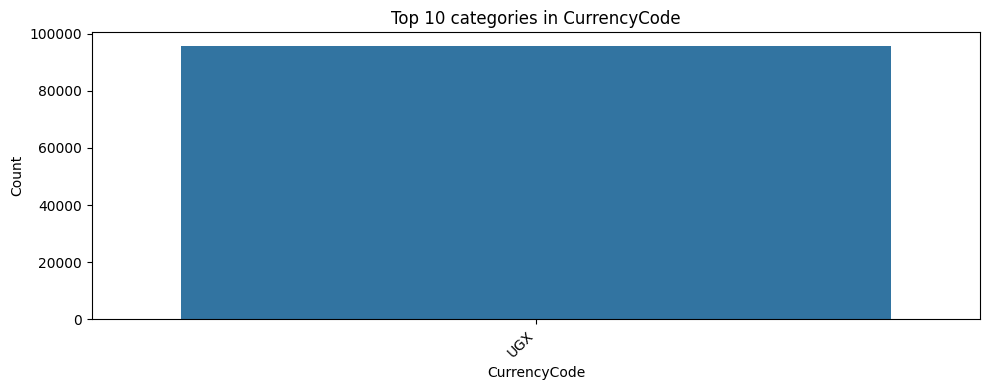

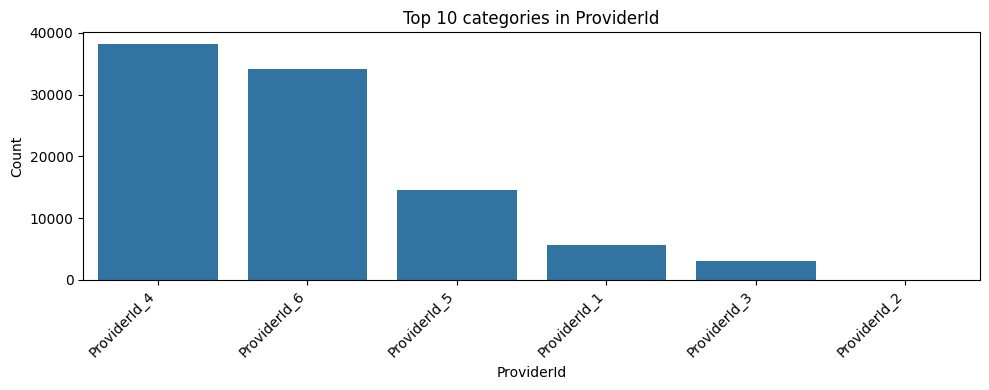

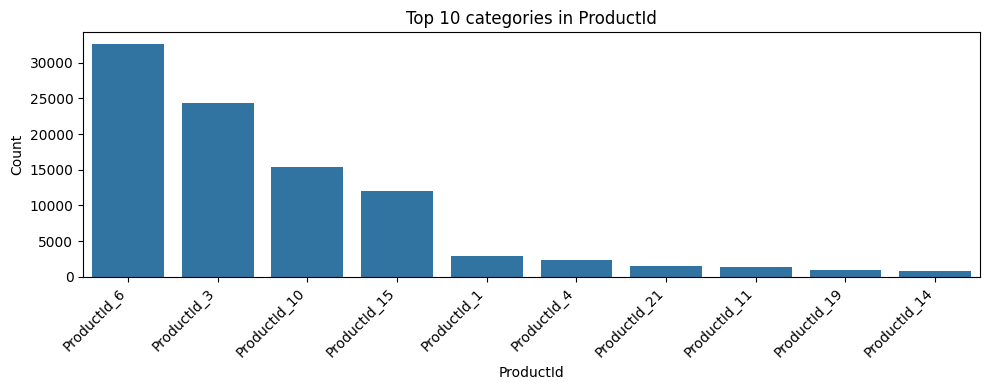

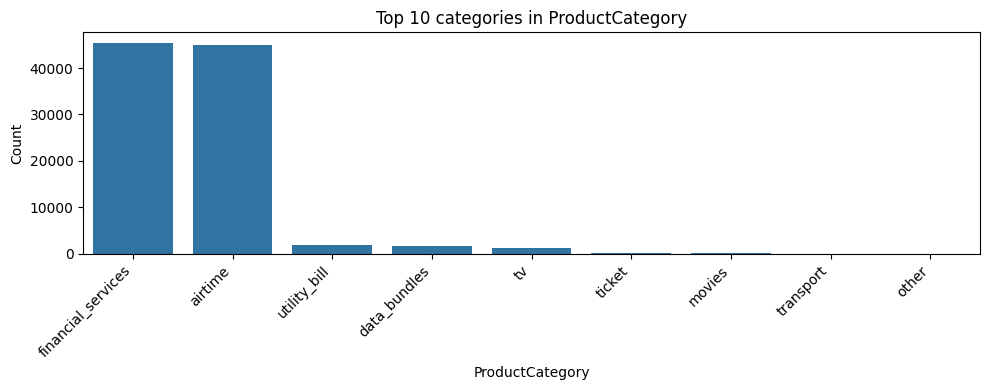

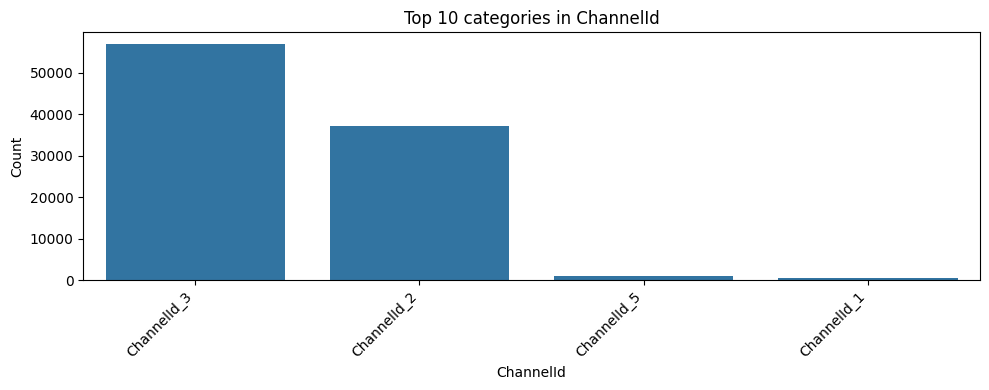

In [ ]:
from eda import plot_categorical_distributions
plot_categorical_distributions(df)

**Observation**:
- **Product Categories**: The top 2 categories (`financial_services`, `airtime`) account for ~95% of volume. Categories like `transport`, `other` are negligible and can be grouped.
- **Provider Dominance**: `ProviderId_4` is the largest provider. Provider-specific risk might be a useful feature.
- **Channel Usage**: `ChannelId_1` (web) dominates usage. Mobile channels are underutilized, which may reflect user demographics or access issues.
-  **Product  id ** : `product id 6` is the most popular product by far, followed by `product id 10` and `product id 3`. Less popular products could be grouped into an "Other" category to reduce dimensionality.